# Project: Exploratory Data Analysis on (Should This Loan be Approved or Denied?)

#### Context of the problem 
The Small Business Administration (SBA) is a United States Government Agency formed in 1953 that provides support to entrepreneurs and small businesses. SBA acts much like an insurance provider to reduce the risk for a bank by taking on some of the risks by guaranteeing a portion of the loan. In the case that a loan goes into default, SBA then covers the amount they guaranteed. Since SBA loans only guarantee a portion of the entire loan balance, banks will incur some losses if a small business defaults on its SBA-guaranteed loan. Therefore, banks are still faced with a difficult choice as to whether they should grant such a loan because of the high risk of default.

#### Description about the data files
Here we are using a dataset from the U.S SBA which includes Historical data from 1987 through 2014 (899,164 observations).

#### Link of the dataset  - 
The link to the dataset is given below.

https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied

#### Agenda:
Identify Explanatory Variables (Indicators or Predictors) based on which we can make our decision about the Loan Pass.
Among 27 different variables from this dataset, we would mainly focus on the below 7 variables:
1. Location - which state had the highest rate of the defaulted loan 
2. Industry - which industry was the most defaulted industry.
3. Gross Disbursement: Amount Disbursed
4. New Versus Established Business
5. Loans backed by Real Estate
6. Economic Recession
7. SBA's Guaranteed Portion of Approved Loan


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The variable name, the data type, and a brief description of
each variable are provided for the 27 variables are given below. 

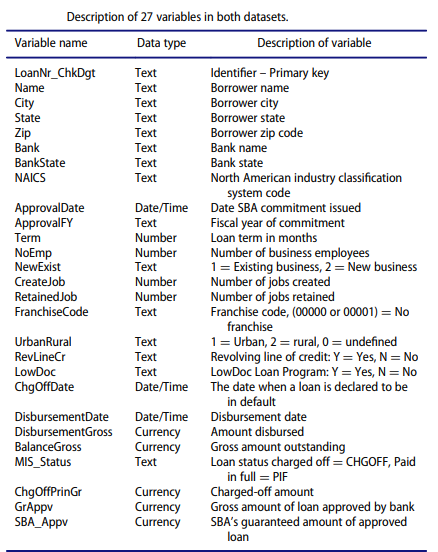

<h1> Import Libraries </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling



In [2]:
# Import data file 
df = pd.read_csv(r'C:\Users\mehta\OneDrive\Desktop\Priya\data analytics career track\capstone-2\sba_files\SBAnational.csv')

C:\Users\mehta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Let's check how many total numbers of rows and columns we have in this dataset 
f"Total number of rows = {df.shape[0]} and Total number of coulumns = {df.shape[1]}"

'Total number of rows = 899164 and Total number of coulumns = 27'

In [4]:
# Top few rows of this dataset
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [5]:
# Total number of missing values we have in this dataset for each column 
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

Let's just drop the chargeoffDate column. since it has a ton of null values and doesn't even provide any useful information.
and also remove other null rows to get the most accurate results or predictions.


In [6]:
# drop all the rows which have null values to clean our dataset for better prediction or analysis
df = df.drop(columns = 'ChgOffDate')
df = df.dropna()

Let's take a look on our dataset after removing all the null values and let's start to digging our dataset to get some analysis

In [7]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

<b>Some of the columns like BalanceGross and GrAppv are objects but should be floating in order for us to start comparing them numerically.</b>

In [8]:
#let's make a function to convert all currencies columns data type from object to float
list_col = ['DisbursementGross','BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv']
def func1(df,list_col):
    for i in list_col:
        #print(df[i].astype(str).str.replace('$',''))
        df[i] = df[i].astype(str).str.replace('$','').str.replace(',','')
        df[i] = pd.to_numeric(df[i])
        df[i]

In [9]:
func1(df,list_col)

C:\Users\mehta\AppData\Local\Temp/ipykernel_280/2876218139.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[i] = df[i].astype(str).str.replace('$','').str.replace(',','')


In [10]:
#Let's take a look on the datatypes of all the coulmns one more time
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

Now we have all the currencies columns with numeric values, now let's take a look at categorial columns which we would use to make our analysis accurate and predictable

In [11]:
# Making column Loan_Status, where 0 would indicate a loan that has been successfully paid in full and 1 would indicate defaulted charges off the loan.
df['Loan_Status'] = df['MIS_Status'].replace({'P I F' : '0', 'CHGOFF' : '1'})
df['Loan_Status'] = df['Loan_Status'].astype(int)

Other columns need some work on their formatting too , let's chahe their formating according to our requirements 

In [12]:
df['ApprovalFY'].unique()
# as we can see below we have one value 1976 which is connected with the alphabetical letter A, here to change its datatype from object to int first we have to remove this letter A

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004', '1994',
       '1979', '1976', '1975', '1974', '1977', '1981', '1982', '1983',
       '1984', '1978', '1980', '1968', '1976A', '1969', '1995', '1970',
       '2005', '1996', '1971', 1996, 1971], dtype=object)

In [13]:
#let's change fiscal year from object to int by replacing A
df['ApprovalFY'] = df['ApprovalFY'].replace({'A': ''},regex = True).astype(int)

In [14]:
# now let's work on the 'New' column, which is indicating 2 to new business and 1 to existing business
# let's change new business to 1 and Existing Business to 0

df['NewExist'] = df['NewExist'].replace(1,0)
df['NewExist'] = df['NewExist'].replace(2,1)

In [15]:
#change RevLineCr to binary variable 
df['RevLineCr'] = df['RevLineCr'].replace({'Y':'1','N':'0'}, regex=True)
valid = ['1', '0']
df = df.loc[df['RevLineCr'].isin(valid)]
df['RevLineCr'] = df['RevLineCr'].astype(int)

In [16]:
#change the LowDoc to binary variables 
df['LowDoc'] = df['LowDoc'].replace({'Y':'1','N':'0'},regex = True)
valid = ['1', '0']
df = df.loc[df['LowDoc'].isin(valid)]
df['LowDoc'] = df['LowDoc'].astype(int)         

<b> In this dataset, we have a very critical point that could affect our analysis, that is its time period.</b>

we must also consider what time period to include in the analyses. For example, in our assignment, an emphasis is placed on the default rates of loans with a disbursement date through 2010. We chose this time period for two reasons. We want to account for variation due to the Great Recession (December 2007 to June 2009) so loans disbursed before, during, and after this time frame are needed. Secondly, we restrict the time frame to loans by excluding those disbursed after 2010 due to the fact the term of a loan is frequently 5 or more years. We believe that the inclusion of loans with disbursement dates after 2010 would provide greater weight to those loans that are charged off versus paid in full. More specifically, loans that are charged off will do so prior to the maturity date of the loan, while loans that will likely be paid in full will do so at the maturity date of the loan (which would extend beyond the dataset ending in 2014). Since this dataset has been restricted to loans for which the outcome is known, there is a greater chance that those loans charged off prior to maturity date will be included in the dataset, while those that might be paid in full have been excluded. It is important to keep in mind that any time restriction on the loans included in the data analyses could introduce selection bias, particularly toward the end of time period. This may impact the performance of any predictive models based on these data.

In [17]:
# I'd like to add a column that would segregate the recession data from others
# recession - 1 if the year of approval is during recession, 0 if not 

rec_years = [1969,1970,1969,1970,1973,1974,1975,1980,1981,1982,1990,1991,2001,2007,2008,2009]
df['Recession'] = df['ApprovalFY'].isin(rec_years)
df['Recession'] = df['Recession'].astype(str)
df['Recession'] = df['Recession'].replace({'False' : '0','True':'1'},regex=True).astype(int)

<b>one more very crucial variable we have in our dataset that is Term. which we can use to get our most important variable that is Loans Backed by Real Estate:</b>

Since the term of the loan is a function of the expected lifetime of the assets, loans backed by real estate will have terms 20 years or greater (>= 240 months) and are the only loans granted for such a long term, whereas loans not backed by real estate will have terms less than 20 years (<240 months).Therefore i have created a variable "RealEstate", where "Realestate" = 1 if "Term" >= 240 months and "RealEstate" = 0 if "Term" < 240 months.

In [18]:
df['RealEstate'] = df['Term'] > 240
df['RealEstate'] = df['RealEstate'].astype(str)
df['RealEstate'] = df['RealEstate'].replace({'False':'0','True':'1'},regex = True).astype(int)

In [19]:
df.to_csv('file_name.csv', encoding='utf-8')

<a id='eda'></a>
## Exploratory Data Analysis

we have done with our cleaning, now it's time to get some analysis.



<u> Identifying Explanatory Variables (Indicators or Predictors) of Potential Risk </u>


<b>1. Location By State : </b> 

In [20]:
# let's take a look on which state had higher default rate
data = df.groupby(['State','Loan_Status'])['State'].count().unstack('Loan_Status')
data.head()

Loan_Status,0,1
State,,
AK,2082,269
AL,6834,1356
AR,5139,1033
AZ,13621,3477
CA,104437,22504


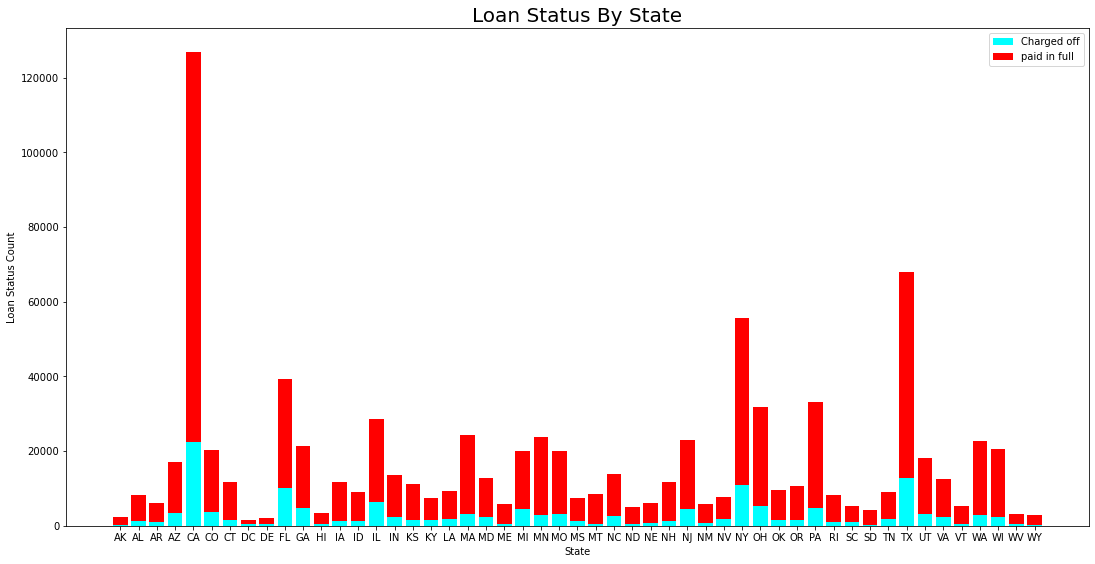

In [21]:
# let's take a look on a bar chart to show loan status by each state.
fig1 = plt.figure(figsize=(60,15))
ax1 =  fig1.add_subplot(2,4,4)
data = df.groupby(['State','Loan_Status'])['State'].count().unstack('Loan_Status')
ax1.bar(data.index, data[1], color='cyan',label = 'Charged off')
ax1.bar(data.index, data[0], color='red',bottom=data[1],label = 'paid in full')
ax1.set_xlabel('State')
ax1.set_ylabel('Loan Status Count')
ax1.legend()
plt.title('Loan Status By State',size=20)
plt.tight_layout()
plt.show()

From the above Bar chart, we can say that California state has a higher default rate than other states.
But still, because of their size, it’s difficult to interpret.
A table showing the percentage of loans defaulted on may be easier to read.

In [22]:
per_st=df.groupby(['State', 'Loan_Status'])['State'].count().unstack('Loan_Status')
per_st['Percent']= per_st[1]/(per_st[1] + per_st[0])
per_st.sort_values(by='Percent', ascending=False)

Loan_Status,0,1,Percent
State,,,
FL,29078,10105,0.257892
DC,1199,370,0.235819
GA,16571,4875,0.227315
IL,22223,6481,0.225787
NV,6033,1754,0.225247
MI,15428,4474,0.224802
TN,7199,1869,0.206109
AZ,13621,3477,0.203357
NJ,18524,4492,0.195169


According to this table, the state where the most defaulted loans are in Florida, followed by Arizona and Nevada. 

<b>2. Industry : </b> It is important for banks to know what industry is more likely to default on a loan

In [23]:
#First, let’s decode the code of the ‘NAICS’ column to a specific industry name. 
df['NAICS_Label'] = df['NAICS'].astype('str').apply(lambda x: x[:2])

df['NAICS_Label'] = df['NAICS_Label'].map({
    '11': 'Agriculture',
    '21': 'Mining/Oil',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'Real Estate',
    '54': 'Prof/Science/Tech',
    '55': 'Industry_Manage',
    '56': 'Admin/Waste',
    '61': 'Educational',
    '62': 'Health/Social',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food',
    '81': 'Other',
    '92': 'Public_Admin'
})

C:\Users\mehta\AppData\Local\Temp/ipykernel_280/108167904.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data.index, rotation = 75,fontsize = 10)


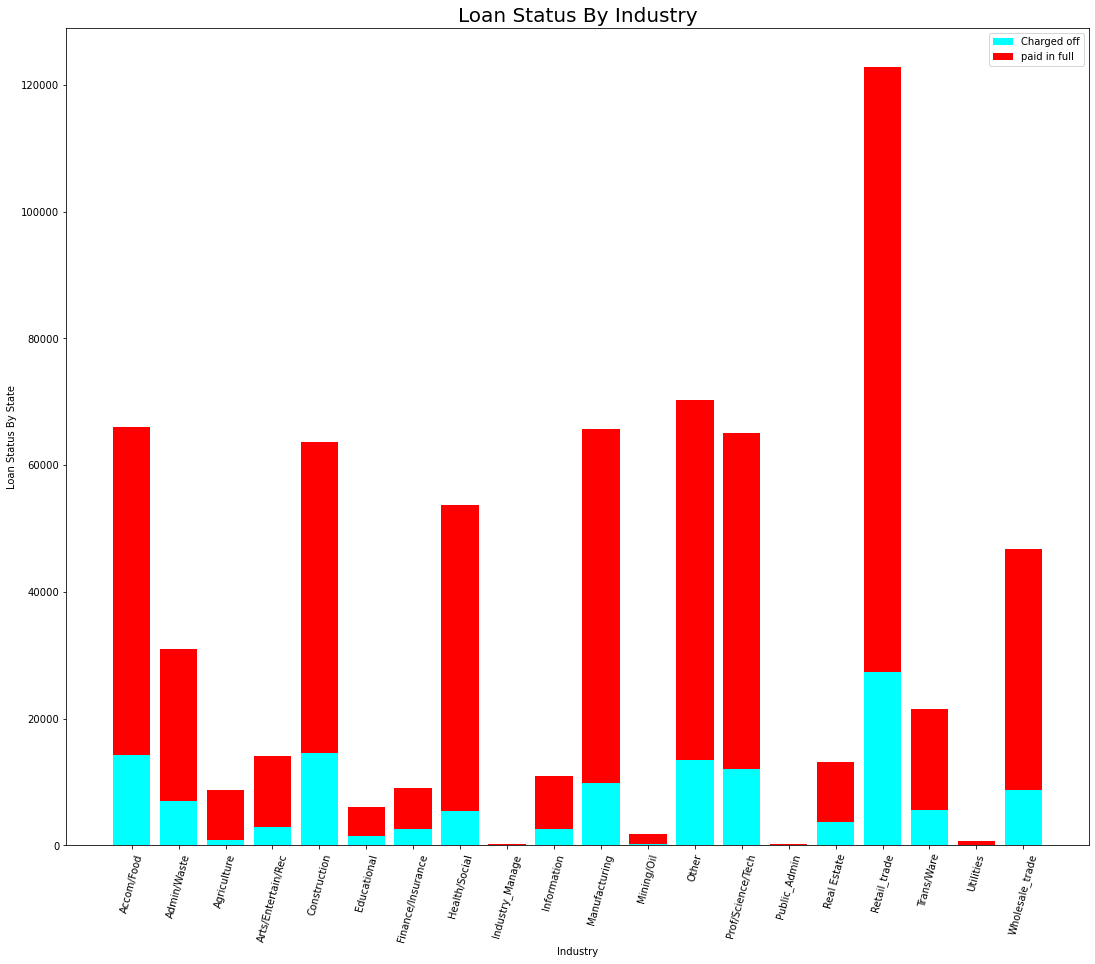

In [24]:
fig1 = plt.figure(figsize=(60,25))
ax1 =  fig1.add_subplot(2,4,4)
data = df.groupby(['NAICS_Label','Loan_Status'])['NAICS_Label'].count().unstack('Loan_Status')
ax1.bar(data.index, data[1], color='cyan',label = 'Charged off')
ax1.bar(data.index, data[0], color='red',bottom=data[1],label = 'paid in full')
ax1.set_xticklabels(data.index, rotation = 75,fontsize = 10)
ax1.set_xlabel('Industry')
ax1.set_ylabel('Loan Status By State')
ax1.legend()
plt.title('Loan Status By Industry',size=20)
plt.tight_layout()
plt.show()

From the above Bar chart, we can say that Retail Trade Industry has a higher default rate than other industries.
But still, because of their size, it’s difficult to interpret.
A table showing the percentage of loans defaulted on may be easier to read.

In [25]:
# Percentage table for each industry level 
per_ind=df.groupby(['NAICS_Label', 'Loan_Status'])['NAICS_Label'].count().unstack('Loan_Status')
per_ind['Percent']= per_ind[1]/(per_ind[1] + per_ind[0])
per_ind.sort_values(by='Percent', ascending=False)

Loan_Status,0,1,Percent
NAICS_Label,,,
Real Estate,9434,3668,0.279957
Finance/Insurance,6579,2517,0.276715
Trans/Ware,15947,5546,0.258038
Information,8279,2650,0.242474
Educational,4685,1451,0.236473
Construction,49196,14513,0.227801
Admin/Waste,23997,6973,0.225153
Retail_trade,95445,27389,0.222976
Accom/Food,51655,14329,0.217159


Finance loans are most likely to be defaulted on, followed by Real Estate and Transportation. Banks should be cautious when loaning to these industries.

<b> 3. New Versus Established Businesses :</b>

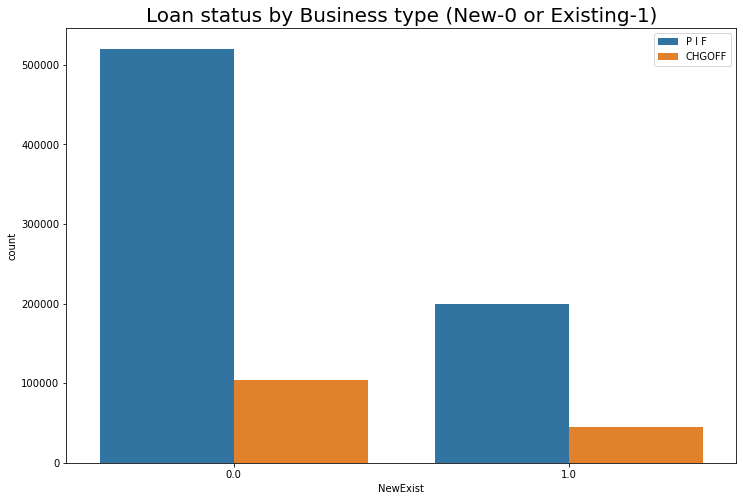

In [26]:
# here 0 refers to new and 1 is for existing businesses 
plt.figure(figsize=(12,8))
sns.countplot(x="NewExist", hue="MIS_Status", data=df)
plt.legend()
plt.title('Loan status by Business type (New-0 or Existing-1)',size=20)
plt.show()

In above bar chart we can clearly see that Default rate for new businesses are higher than the existing one.

<b> 4. Loans Backed by Real Estate : </b>

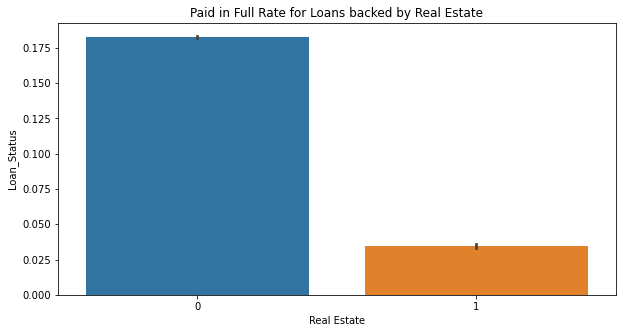

In [27]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x="RealEstate", y="Loan_Status", data=df)
plt.title('Paid in Full Rate for Loans backed by Real Estate')
plt.xlabel('Real Estate')
plt.show()

Loans backed by real estate have a significantly lower default rate than loans not backed by real estate

<b> 4. Apporoved Loans Over Time : </b>

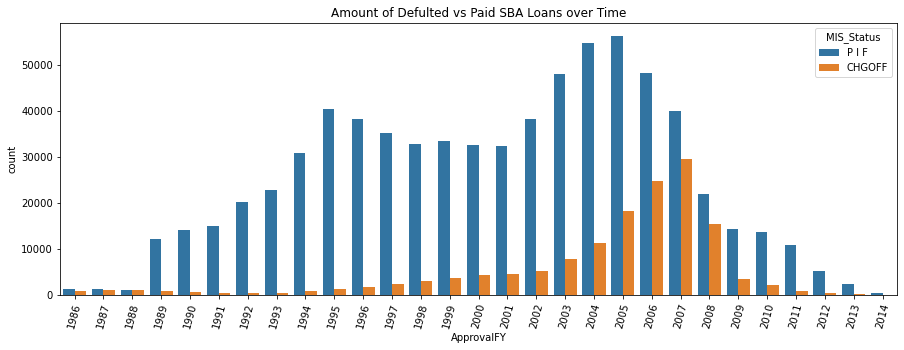

In [28]:
post_1985 = df[df['ApprovalFY'] >= 1986]
fig = plt.figure(figsize=(15,5))
sns.countplot(x="ApprovalFY",data=post_1985,hue="MIS_Status")
plt.title('Amount of Defulted vs Paid SBA Loans over Time')
plt.xticks(rotation=75)
plt.show()

Here in the above chart, we can see the behavior of approved loans over time, and here we have a very intersecting fact about recession on loans. Loans that had been passed during the recession period have a higher default rate.

<b> 5. Terms (Loan duration in months): </b>

In [29]:
per_tr=df.groupby(['Term', 'Loan_Status'])['Term'].count().unstack('Loan_Status')
per_tr['Percent']= per_tr[1]/(per_tr[1] + per_tr[0])
per_tr.sort_values(by='Percent', ascending=False).head(10)

Loan_Status,0,1,Percent
Term,,,
0,67.0,690.0,0.911493
44,216.0,1947.0,0.900139
43,224.0,1907.0,0.894885
53,245.0,2010.0,0.891353
31,205.0,1643.0,0.889069
29,192.0,1460.0,0.883777
45,245.0,1836.0,0.882268
32,216.0,1601.0,0.881123
37,268.0,1884.0,0.875465


Based off of this table and chart, it seems loan terms in the 30-60 month range are most likely to be defaulted on. Banks should be cautious giving out mid-range Term loans.

<b> 6. Low Documents : </b> 

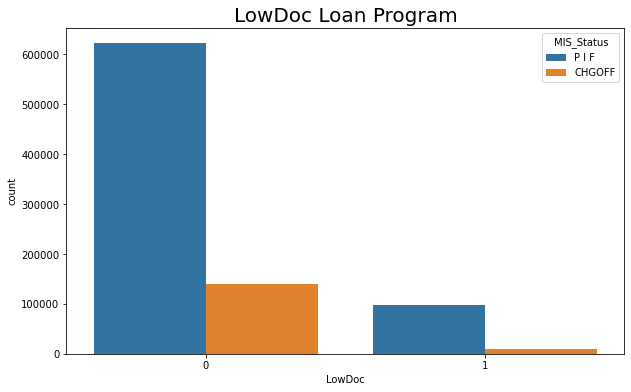

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['LowDoc'], hue="MIS_Status", data=df)
plt.title('LowDoc Loan Program', size=20)
plt.show()

The above Bar chart is clearly indicating that loans with lower documents had a higher default rate.

<b> 7. Correlations for all numerical variables : </b>

In [31]:
# let's try to find our some important aspects for our numeric data variables
# for that firstly i have craeted a seperate dataframe with all the numeric variables 
num_list = ['RealEstate','Recession','Loan_Status','SBA_Appv','GrAppv','BalanceGross','DisbursementGross','LowDoc','RevLineCr','ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob','UrbanRural']
num_df = df[num_list]
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RealEstate,869181.0,0.075470,0.264148,0.0,0.0,0.0,0.0,1.0
Recession,869181.0,0.221841,0.415485,0.0,0.0,0.0,0.0,1.0
Loan_Status,869181.0,0.171396,0.376855,0.0,0.0,0.0,0.0,1.0
SBA_Appv,869181.0,151962.798386,229145.682213,500.0,22500.0,63750.0,178500.0,4500000.0
GrAppv,869181.0,195784.310398,284814.292028,1000.0,35000.0,95000.0,231000.0,5000000.0
BalanceGross,869181.0,3.030043,1466.085598,0.0,0.0,0.0,0.0,996262.0
DisbursementGross,869181.0,203944.101982,288756.247983,4000.0,44000.0,100000.0,242600.0,11446325.0
LowDoc,869181.0,0.124118,0.329716,0.0,0.0,0.0,0.0,1.0
RevLineCr,869181.0,0.227916,0.419488,0.0,0.0,0.0,0.0,1.0
ApprovalFY,869181.0,2001.079421,5.901586,1968.0,1997.0,2002.0,2006.0,2014.0


Noticeable Points :
1. RealEstate : had a mean of 0.07 , it means only 7% of all Loans were backed by real estate.
2. NewExist : had a mean of 0.28 , means 28% of all loans were given to new businesses.
3. Recession : had mean pf .22, means 22% of all loans were approved during Recession.

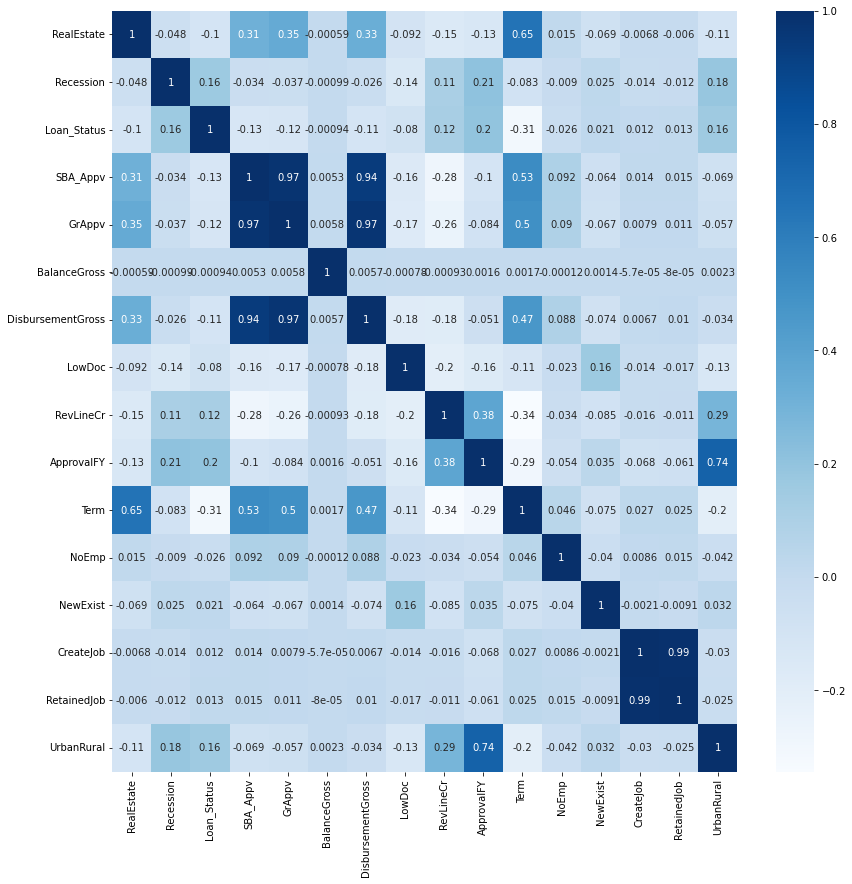

In [32]:
# let's see relationships between the variables with the help of graphics 
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(num_df.corr(),annot = True, cmap= "Blues")
plt.show()

The highest correlation is with DisbursementGross and GrAppv which makes sense as it is likely that the amount a business is approved for will be the amount that is disbursed to them.
Nothing else on this heatmap appears to have a significant correlation.

<a id='conclusions'></a>
## Conclusions




<b>1. State </b> : The bank has to be a little careful while passing loans for the state of Florida, Arizona, and Nevada.




<b>2.  Industry </b> : Finance loans are most likely to be defaulted on Real Estate and Transportation. Banks should be cautious when loaning to these industries.

<b>3.  New or Existing Business </b> : This data has shown Default rate for new businesses is higher than the existing one.

<b>4.  Loans Backed by Real Estate </b> : Loans backed by real estate have a significantly lower default rate than loans not backed by real estate. It means the value of land must be often large enough to cover the amount of any principal outstanding.

<b> 5. Economic Recession </b>Small business loans are affected by the economy in general, and more small business loans tend to default right before and during an economic recession.

<b> 6. Term </b> loan terms in the 30-60 month range are most likely to be defaulted on. Banks should be cautious giving out mid-range Term loans.

<b> 7. Low Documents: </b>Loans with lower documents had a higher default rate. so, banks must be very careful with the documents while loaning to these industries.